# Is Jack alive?                                                                       
by Mohammad Shahebaz

This notebook is my one of my attempt to study the dataset, nit picking the features and predict the outcome using **Logistic Regression Model** and **Random Forests** along account of taking various **random states** in considerations.
<img src="jack.jpg",width=auto>

### Why  I chose Logistic Reg? 
Logistic regression measures the relationship between the categorical dependent variable and one or more independent variables by estimating probabilities using a logistic function, which is the cumulative logistic distribution. Thus, it treats the same set of problems as probit regression using similar techniques, with the latter using a cumulative normal distribution curve instead. Equivalently, in the latent variable interpretations of these two methods, the first assumes a standard logistic distribution of errors and the second a standard normal distribution of errors.
<br>

In [53]:
#Standard imports 

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [54]:
gendersub = pd.read_csv('gender_submission.csv')

In [55]:
train = pd.read_csv('train.csv')

In [56]:
test = pd.read_csv('test.csv')

In [57]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Checking how many values in the dataset are null 

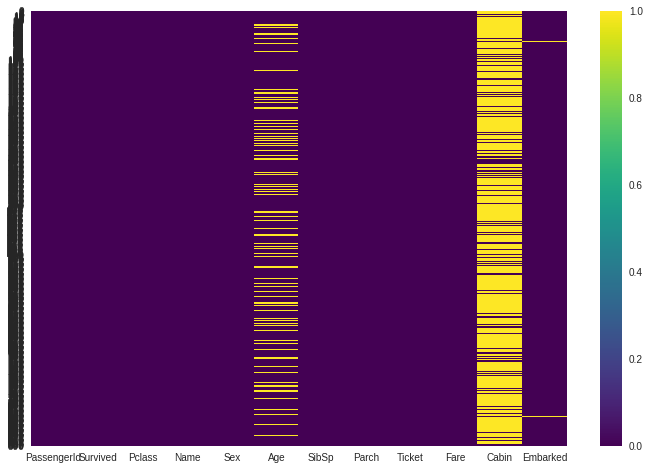

In [58]:
plt.figure(figsize=(12,8))
sns.heatmap(train.isnull(),cmap='viridis')

It seems that we have fewer **Age** and lots of **Cabin** data missing. So, lets fix that!

Coding a sin_bin() function which changes the values of **Sex** to **1** if **'male'**

In [59]:
def sin_bin(x):
    if x =='male':
        return 1
    else:
        return 0

In [60]:
train['Sex'] = train['Sex'].apply(sin_bin)

#### Observing the distribution of Age 

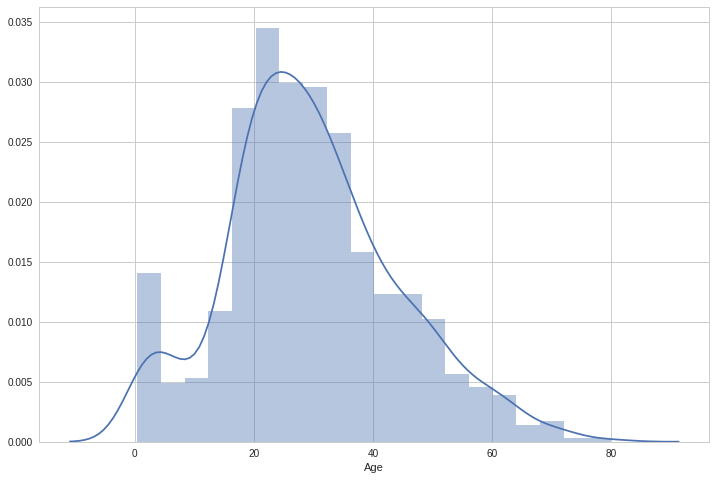

In [61]:
plt.figure(figsize=(12,8))
sns.distplot(train['Age'].dropna())

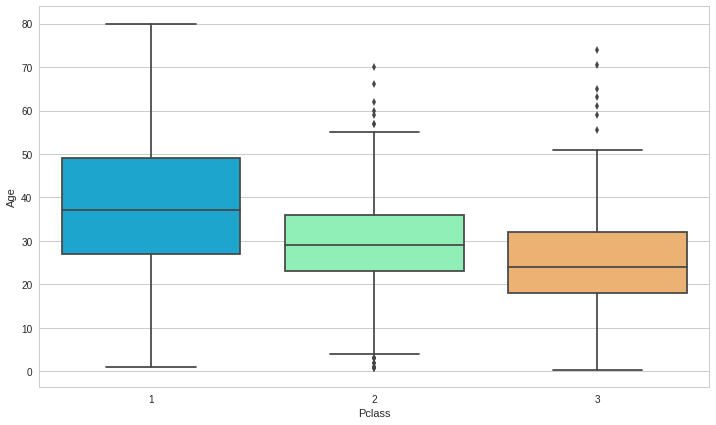

In [62]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=train,palette='rainbow')

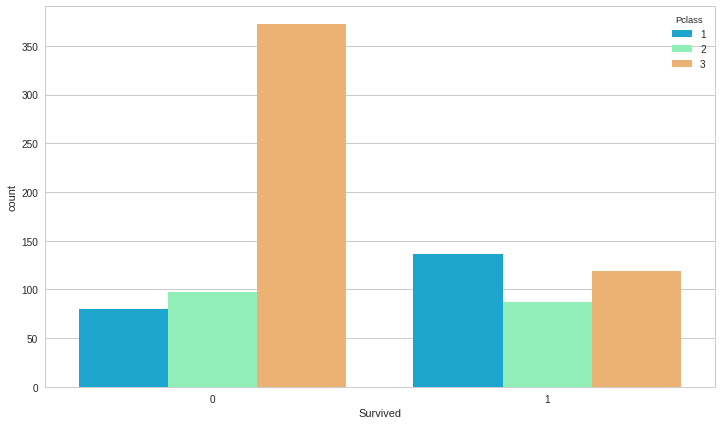

In [63]:
plt.figure(figsize=(12, 7))
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=train,palette='rainbow')

In the above box plot the relation between the Class and Age is significant. And, it makes sense as the older people are richer hence belonging to class 1. From this data we are going to take the means from the above plot to fill in the missing data of Age column.

Similarly we can code other two functions emark_num and is_cab for converting the three Emabarked strings 'C', 'Q' and 'S' to numbers. 

And, in my analysis I have opted to not drop the cabins column and using it as feature for having a cabin or **not**.

In [64]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age
    
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

In [65]:
def emark_num(x):
    if x is 'C':
        return 1
    elif x is 'Q':
        return 2
    else:
        return 3
    
train['Embarked'] = train['Embarked'].apply(emark_num)

In [66]:
# trim 1
# train.drop(['PassengerId','Name'],axis=1, inplace=True)
train.drop(['Name','Ticket','PassengerId'],axis=1,inplace=True)
train.drop

In [67]:
def is_cab(z):
    
    if isinstance(z, float):
        return 0
    else:
        return 1

train['Cabin'] = train['Cabin'].apply(is_cab)

In [68]:
# Checking the head for cleansed data
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,1,22.0,1,0,7.2500,0,3
1,1,1,0,38.0,1,0,71.2833,1,1
2,1,3,0,26.0,0,0,7.9250,0,3
3,1,1,0,35.0,1,0,53.1000,1,3
4,0,3,1,35.0,0,0,8.0500,0,3


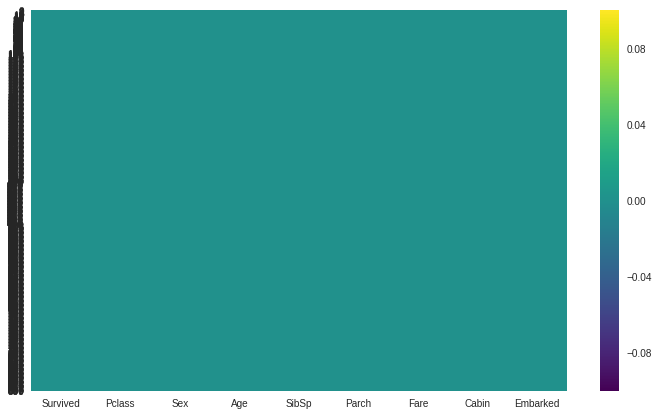

In [69]:
# Checking the heatmap to verify the null data
plt.figure(figsize=(12, 7))
sns.heatmap(train.isnull(), cmap='viridis')

## Training and Predicting
Opting for **Logistic Regression**

In [70]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train.drop('Survived',axis=1), 
                                                    train['Survived'], test_size=0.333, 
                                                    random_state=2014) 

### Predicting Output

In [43]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score

Let's move on to the evaluation part

## Evaluation

In [44]:
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print(accuracy_score(y_test,predictions)*100)

[[172  18]
 [ 21  86]]
             precision    recall  f1-score   support

          0       0.89      0.91      0.90       190
          1       0.83      0.80      0.82       107

avg / total       0.87      0.87      0.87       297

86.8686868687


## Choosing Random state

In [35]:
# accuracy_scores = []
# for i in range(1,3000):
#     from sklearn.model_selection import train_test_split

#     X_train, X_test, y_train, y_test = train_test_split(train.drop('Survived',axis=1), 
#                                                         train['Survived'], test_size=0.333, 
#                                                         random_state=i) 
#     from sklearn.linear_model import LogisticRegression
#     logmodel = LogisticRegression()
#     logmodel.fit(X_train,y_train)
#     predictions = logmodel.predict(X_test)
#     from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
#     accuracy_scores.append(accuracy_score(y_test,predictions))

In [31]:
# max(accuracy_scores)

0.86868686868686873